Везьменова Ксения

Вариант 4

1. Выбрать данные из файла «Семинар 9.xlsx» в соответствии со своим вариантом.
2. Выполнить кластеризацию по методу k-средних с 2, 3, 4, 5 кластерами. Вывести графически результаты кластеризации. Вывести график зависимости силуэта от числа кластеров. Указать, для какого числа кластеров достигается максимум силуэта.
3. Выполнить кластеризацию по методу DBSCAN. Вывести графически результаты кластеризации.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_excel('Семинар 9.xlsx', sheet_name = '4', names = ['num', 'x1', 'x2']).drop('num', axis = 1)
data

,x1,x2
0,-3.557751,-0.763019
1,-6.251250,-0.615729
2,-5.041480,-0.546711
3,-5.216450,0.888679
4,-5.453038,-0.268599
...,...,...
395,2.606552,5.105489
396,0.431782,6.118249
397,3.212074,5.835800
398,2.818324,6.510023


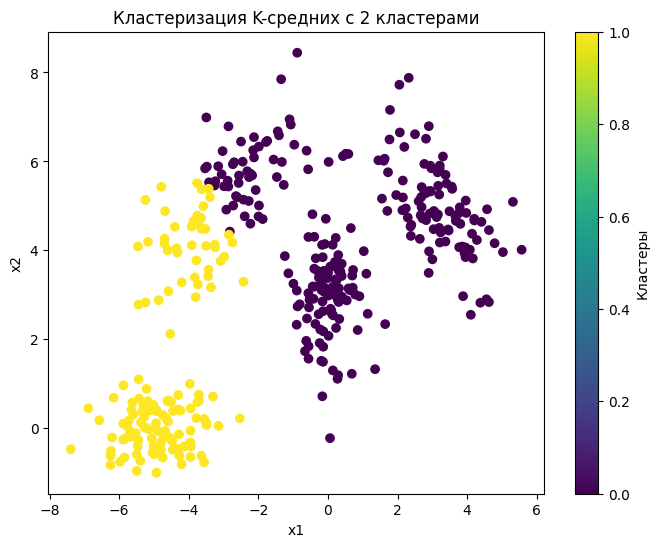

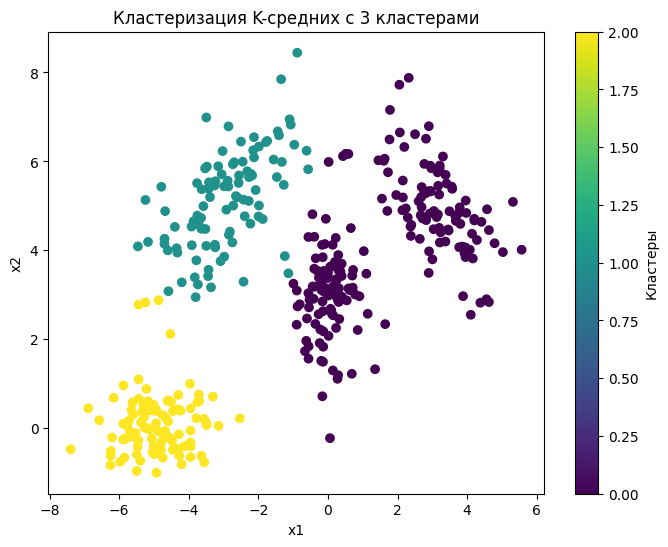

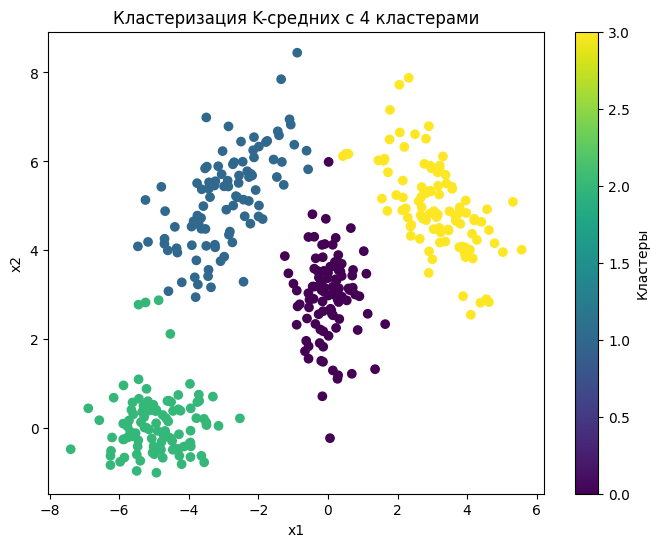

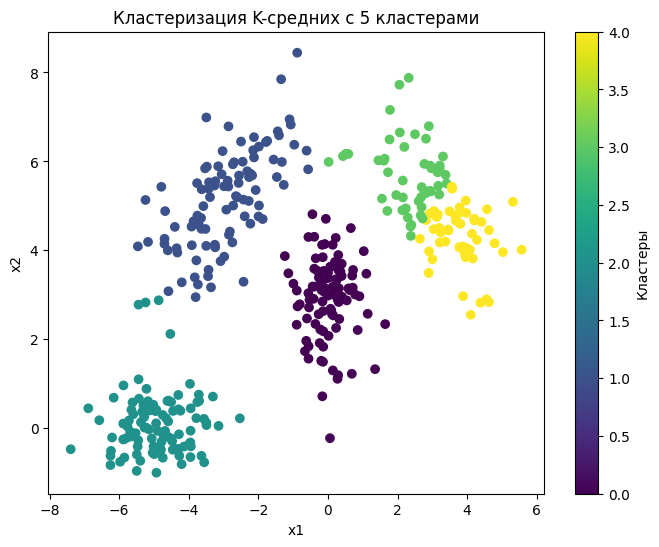

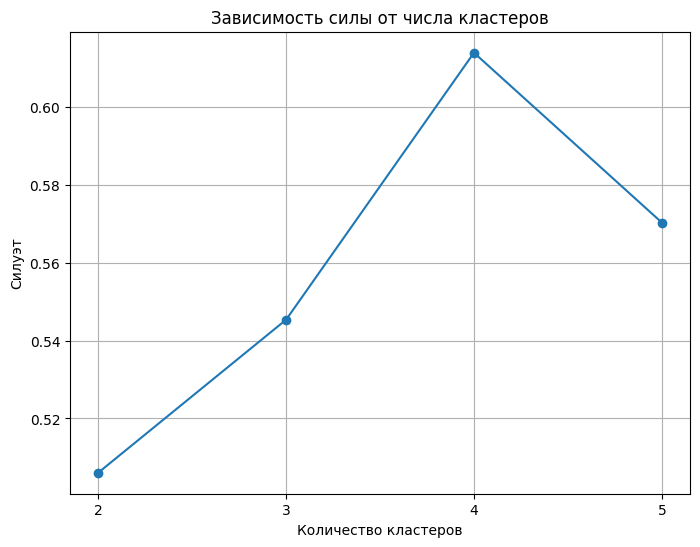

Максимальное значение силуэта достигается при 4 кластерах: 0.61


In [5]:
n_clusters_range = [2, 3, 4, 5]
silhouette_scores = []

for n_clusters in n_clusters_range:
  kmeans = KMeans(n_clusters = n_clusters, random_state = 42)
  cluster_labels = kmeans.fit_predict(data)
  silhouette_avg = silhouette_score(data, cluster_labels)
  silhouette_scores.append(silhouette_avg)

  plt.figure(figsize = (8, 6))
  plt.scatter(data['x1'], data['x2'], c = cluster_labels, cmap = 'viridis', marker = 'o')
  plt.title(f'Кластеризация K-средних с {n_clusters} кластерами')
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.colorbar(label = 'Кластеры')
  plt.show()

plt.figure(figsize = (8, 6))
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.title('Зависимость силы от числа кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('Силуэт')
plt.xticks(n_clusters_range)
plt.grid()
plt.show()

max_silhouette_index = np.argmax(silhouette_scores)
best_n_clusters = n_clusters_range[max_silhouette_index]
max_silhouette_score = silhouette_scores[max_silhouette_index]
print(f'Максимальное значение силуэта достигается при {best_n_clusters} кластерах: {max_silhouette_score:.2f}')

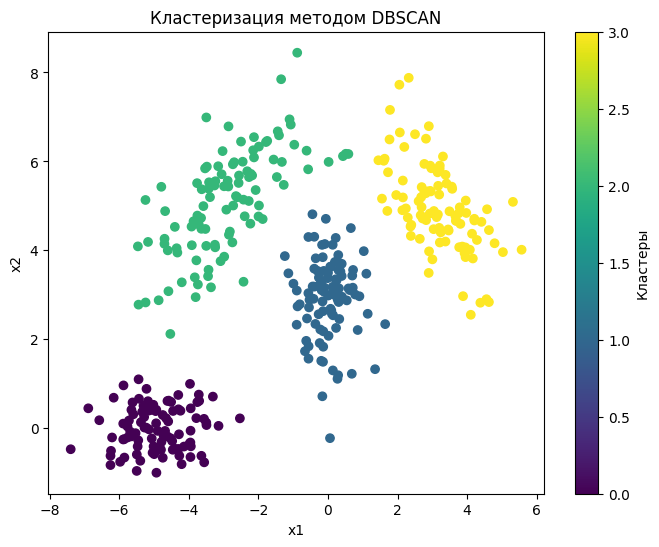

Количество кластеров, обнаруженных DBSCAN: 4


In [6]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

eps = 0.3
min_samples = 6

dbscan = DBSCAN(eps = eps, min_samples = min_samples)
dbscan_labels = dbscan.fit_predict(data_scaled)

labels_unique = set(dbscan_labels) - {-1}
for i in range(len(dbscan_labels)):
    if dbscan_labels[i] == -1:
        distances = np.linalg.norm(data_scaled[i] - data_scaled[dbscan.labels_ != -1], axis = 1)
        closest_index = np.argmin(distances)
        dbscan_labels[i] = dbscan.labels_[dbscan.labels_ != -1][closest_index]

plt.figure(figsize = (8, 6))
plt.scatter(data['x1'], data['x2'], c = dbscan_labels, cmap = 'viridis', marker = 'o')
plt.title('Кластеризация методом DBSCAN')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label = 'Кластеры')
plt.show()

n_clusters_dbscan = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f'Количество кластеров, обнаруженных DBSCAN: {n_clusters_dbscan}')